In [2]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from xgboost import XGBRegressor
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import RobustScaler

In [ ]:
ticker_market = yf.Ticker('BMRI.JK')
df = ticker_market.history(period='5y')
df.index = pd.to_datetime(df.index, format='%Y-%m-%d')
df = df.drop(['Dividends', 'Stock Splits'], axis=1)
df

,Open,High,Low,Close,Volume
Date,,,,,
2019-11-29 00:00:00+07:00,5569.848459,5627.960843,5565.378276,5614.550293,52954500
2019-12-02 00:00:00+07:00,5614.549277,5744.184570,5605.608911,5744.184570,49909000
2019-12-03 00:00:00+07:00,5739.715538,5739.715538,5672.662786,5699.483887,42823000
2019-12-04 00:00:00+07:00,5686.073274,5721.834741,5681.603090,5690.543457,37552000
2019-12-05 00:00:00+07:00,5686.072136,5708.423049,5659.251041,5668.191406,54168000
...,...,...,...,...,...
2024-11-22 00:00:00+07:00,9925.000000,9950.000000,9850.000000,9850.000000,58396100
2024-11-25 00:00:00+07:00,9950.000000,10200.000000,9900.000000,10175.000000,165369400
2024-11-26 00:00:00+07:00,10250.000000,10250.000000,10000.000000,10000.000000,62310100


## Normalized

In [5]:
rs = RobustScaler()
df[['scaled_open', 'scaled_high', 'scaled_low', 'scaled_volume']] = rs.fit_transform(df[['Open','High','Low','Volume']])

## Checking Correlation

In [191]:
corr = df[['scaled_open','scaled_high','scaled_low','scaled_volume','Close']].corr('pearson')
print(corr)

               scaled_open  scaled_high  scaled_low  scaled_volume     Close
scaled_open       1.000000     0.998929    0.999236      -0.148708  0.998146
scaled_high       0.998929     1.000000    0.998833      -0.132433  0.999064
scaled_low        0.999236     0.998833    1.000000      -0.157474  0.999120
scaled_volume    -0.148708    -0.132433   -0.157474       1.000000 -0.145097
Close             0.998146     0.999064    0.999120      -0.145097  1.000000


### BMRI

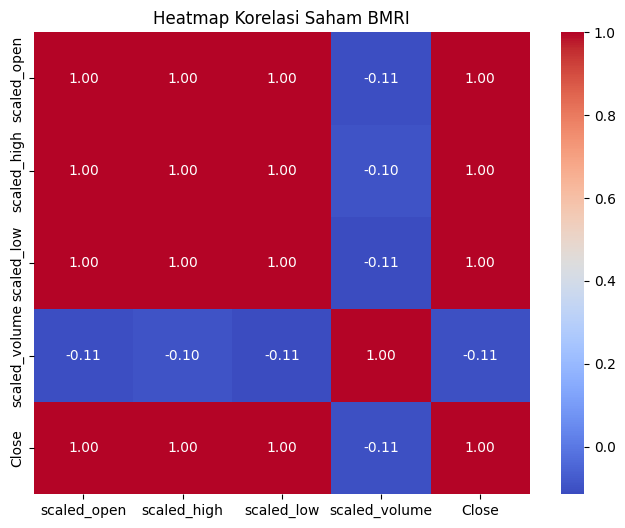

In [65]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Heatmap Korelasi Saham BMRI')
plt.show()

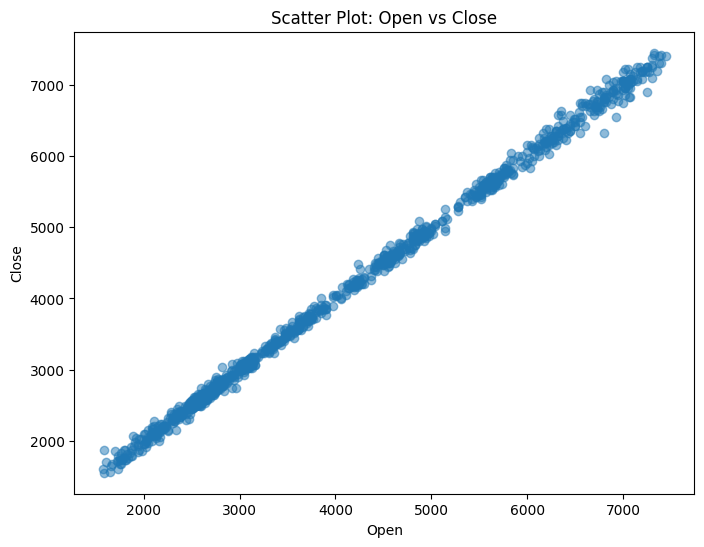

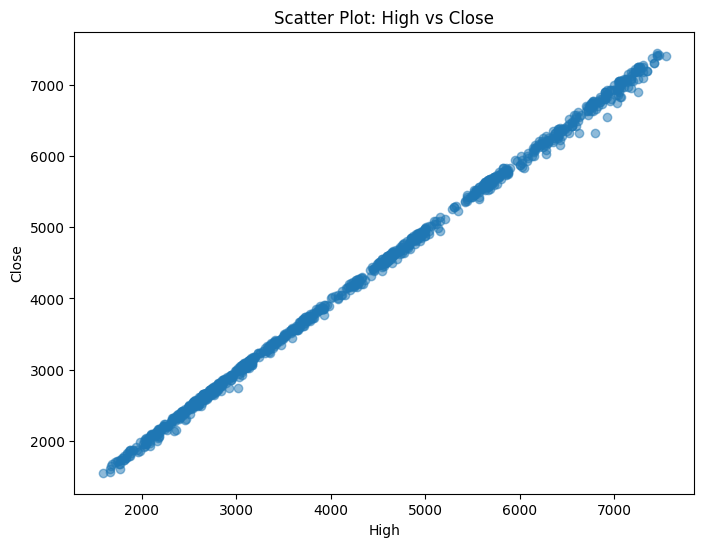

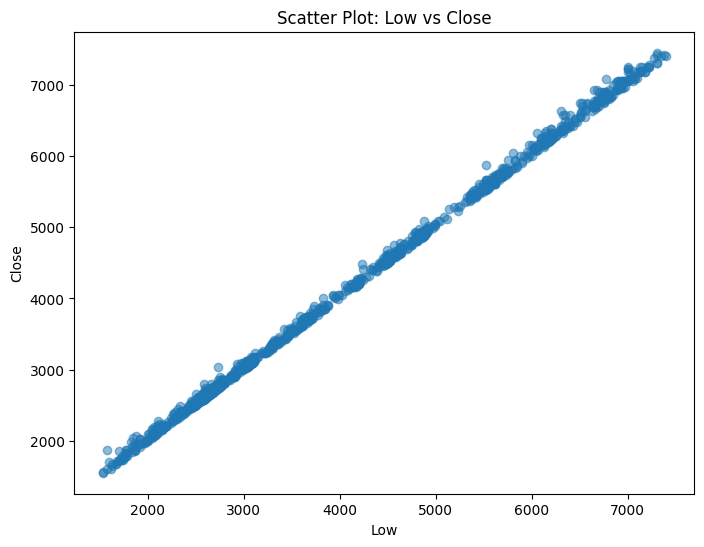

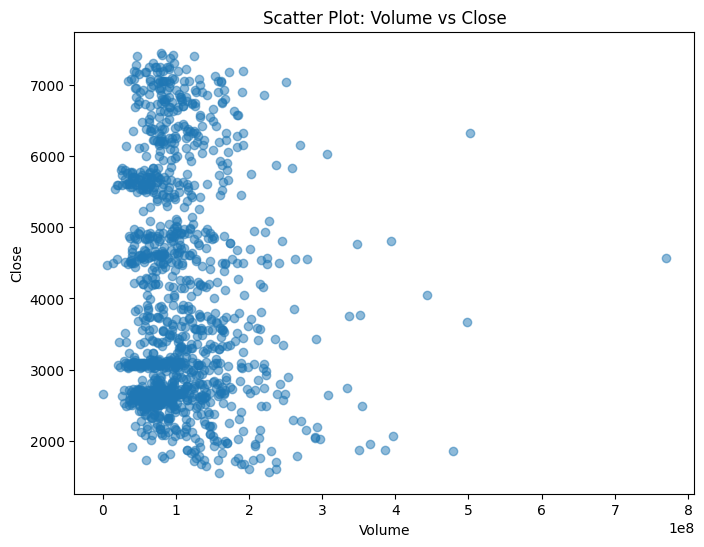

In [66]:
features = ['Open', 'High', 'Low', 'Volume']
for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[feature], df['Close'], alpha=0.5)
    plt.title(f'Scatter Plot: {feature} vs Close')
    plt.xlabel(feature)
    plt.ylabel('Close')
    plt.show()

### BBCA

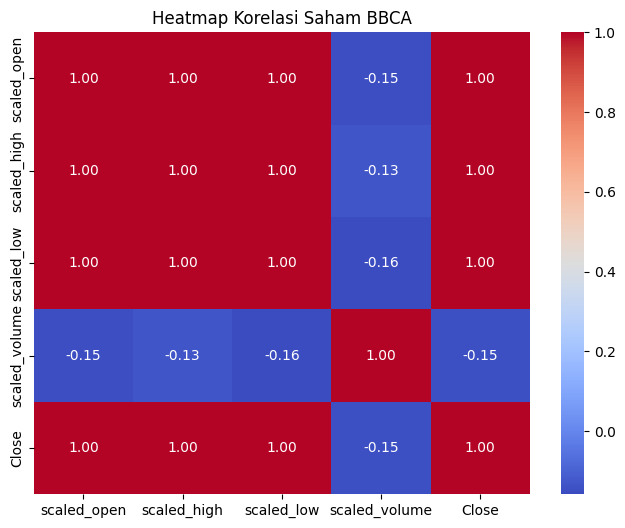

In [193]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Heatmap Korelasi Saham BBCA')
plt.show()

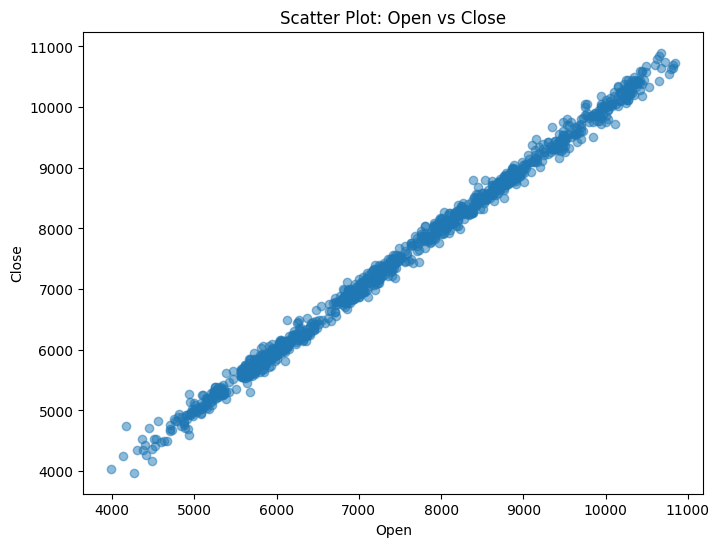

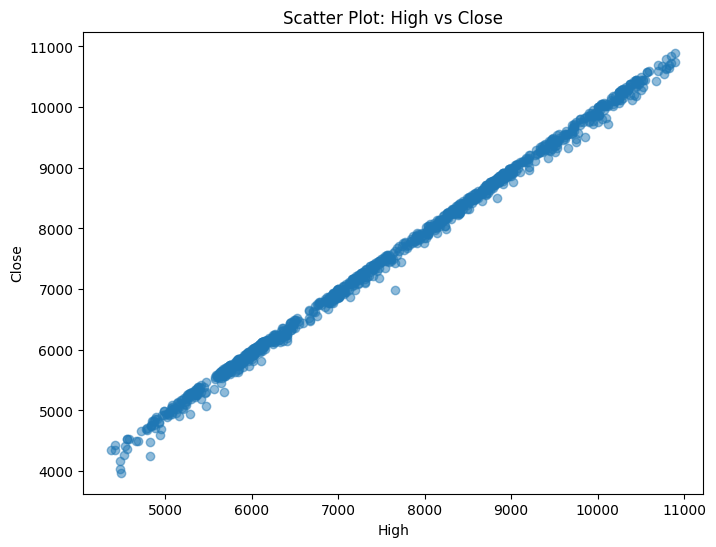

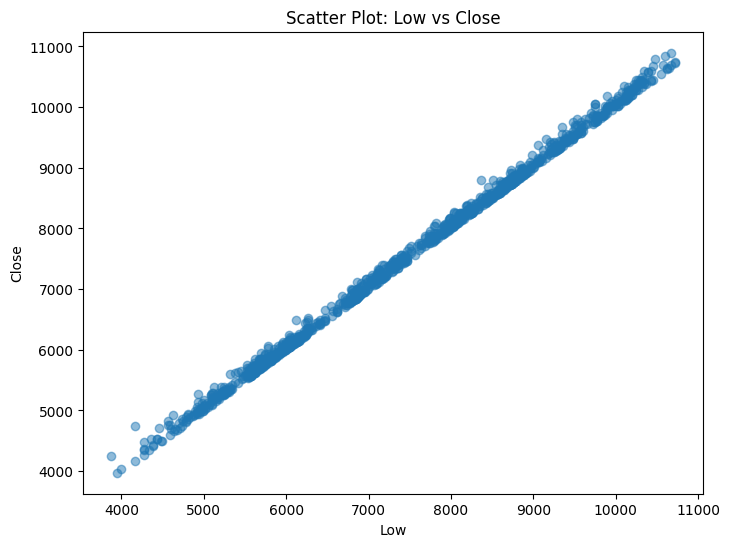

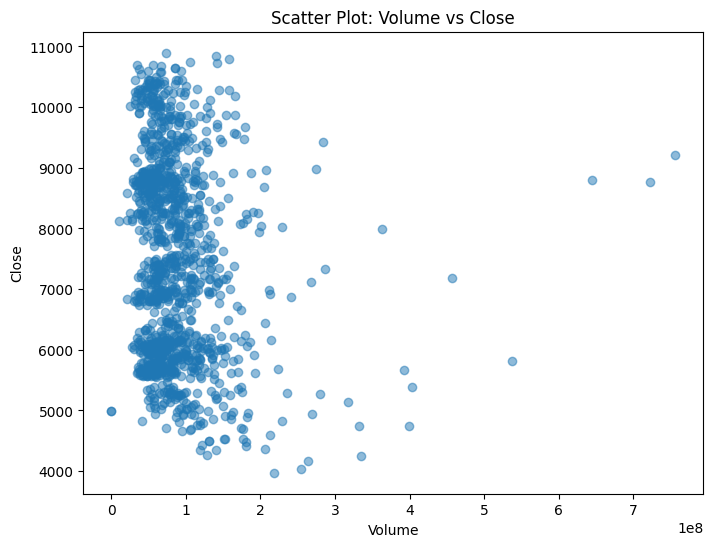

In [71]:
features = ['Open', 'High', 'Low', 'Volume']
for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[feature], df['Close'], alpha=0.5)
    plt.title(f'Scatter Plot: {feature} vs Close')
    plt.xlabel(feature)
    plt.ylabel('Close')
    plt.show()

### ARTO

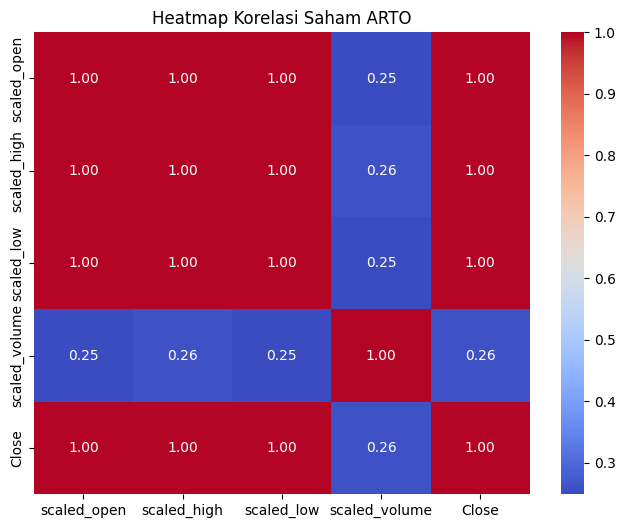

In [188]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Heatmap Korelasi Saham ARTO')
plt.show()

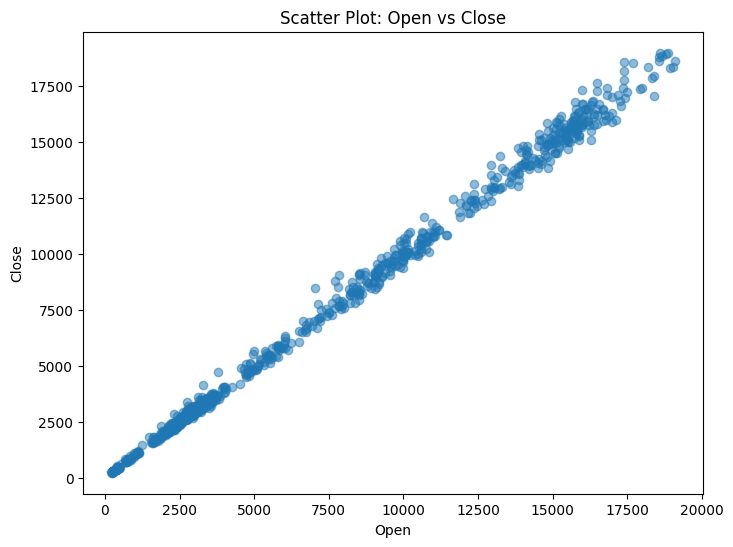

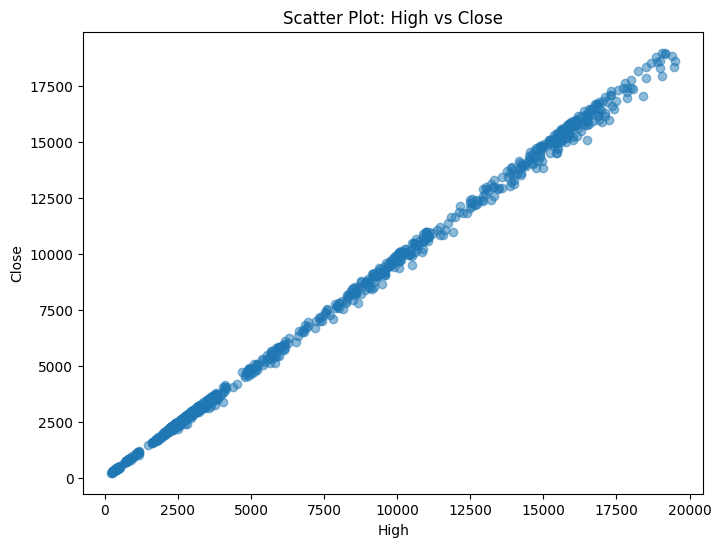

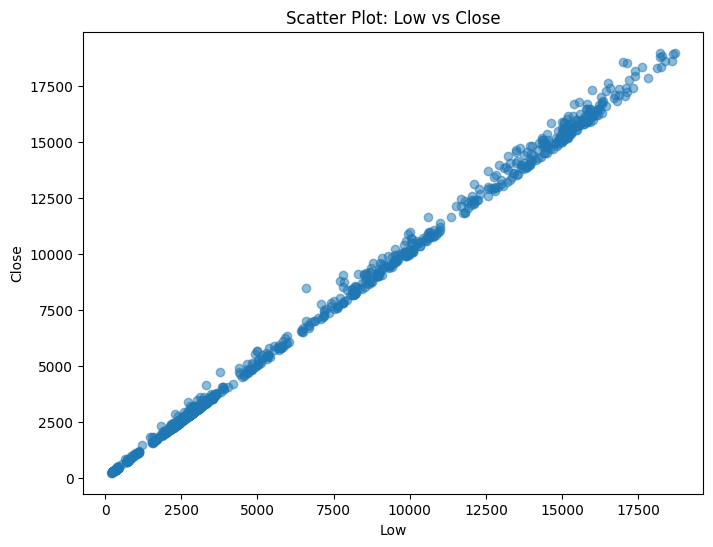

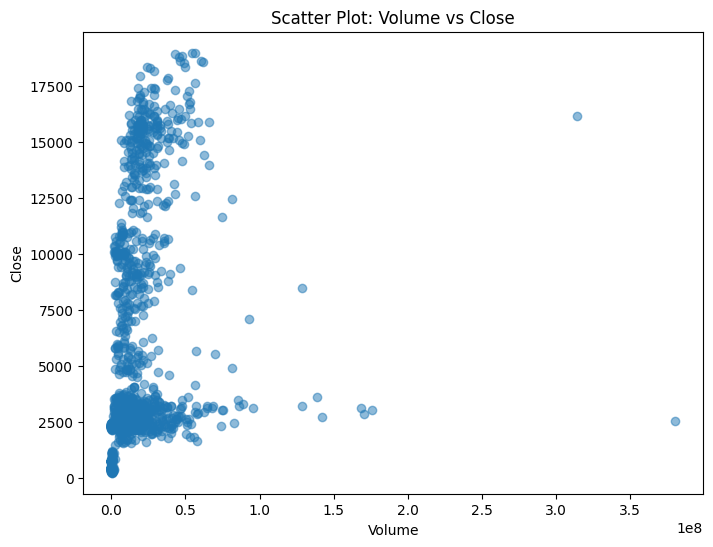

In [76]:
features = ['Open', 'High', 'Low', 'Volume']
for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[feature], df['Close'], alpha=0.5)
    plt.title(f'Scatter Plot: {feature} vs Close')
    plt.xlabel(feature)
    plt.ylabel('Close')
    plt.show()

### BBNI

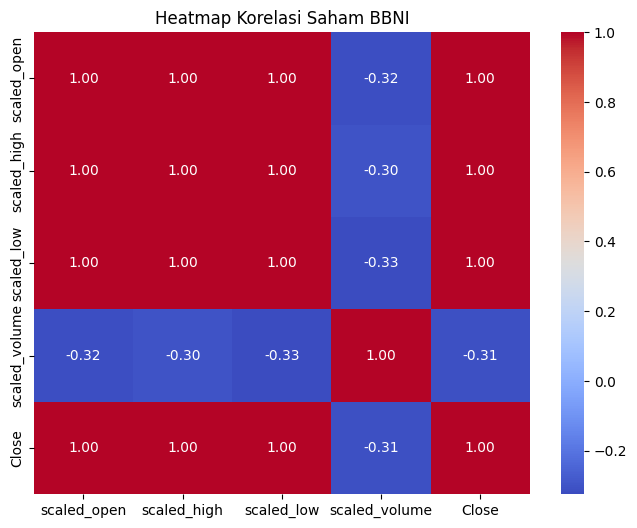

In [80]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Heatmap Korelasi Saham BBNI')
plt.show()

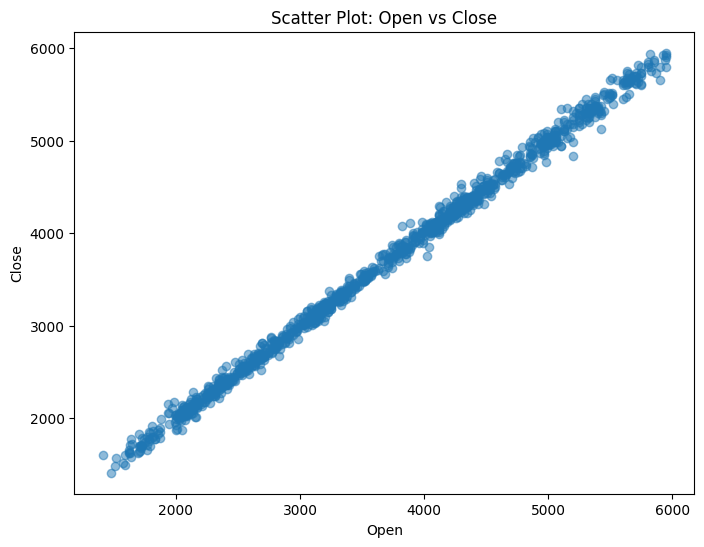

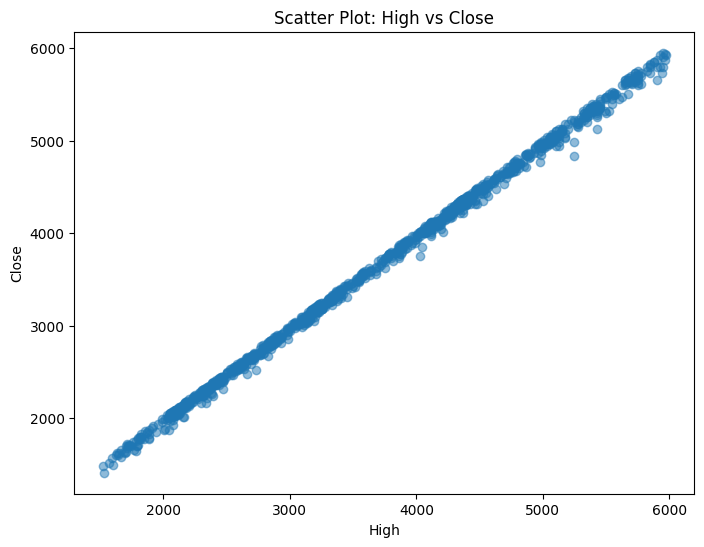

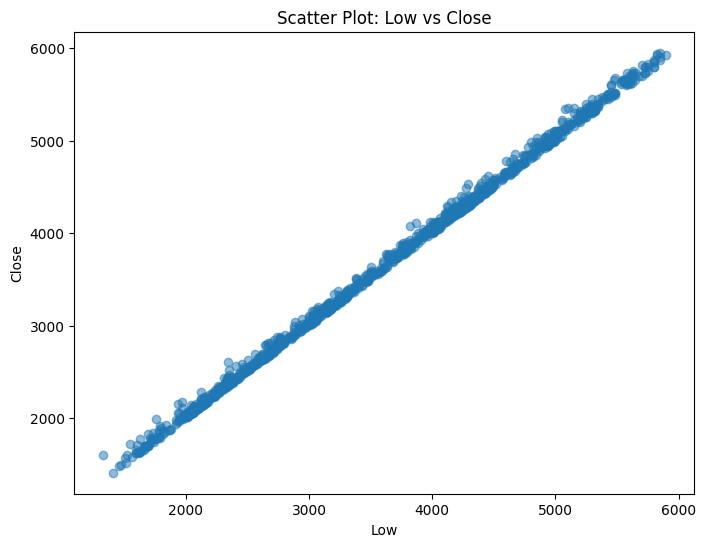

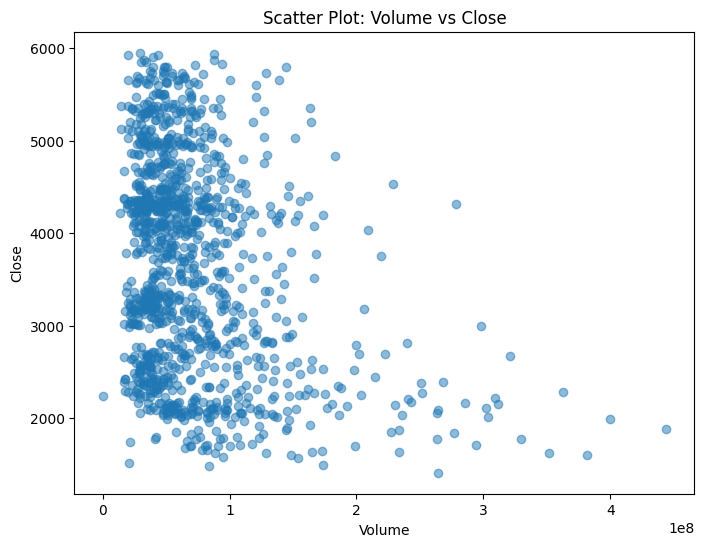

In [81]:
features = ['Open', 'High', 'Low', 'Volume']
for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[feature], df['Close'], alpha=0.5)
    plt.title(f'Scatter Plot: {feature} vs Close')
    plt.xlabel(feature)
    plt.ylabel('Close')
    plt.show()

### BBRI

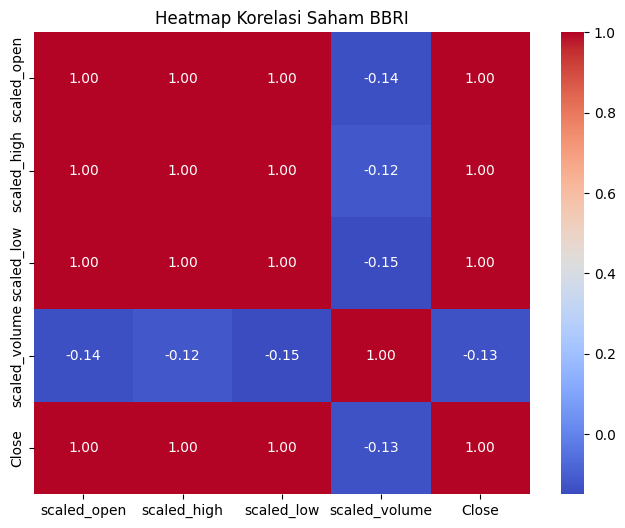

In [86]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Heatmap Korelasi Saham BBRI')
plt.show()

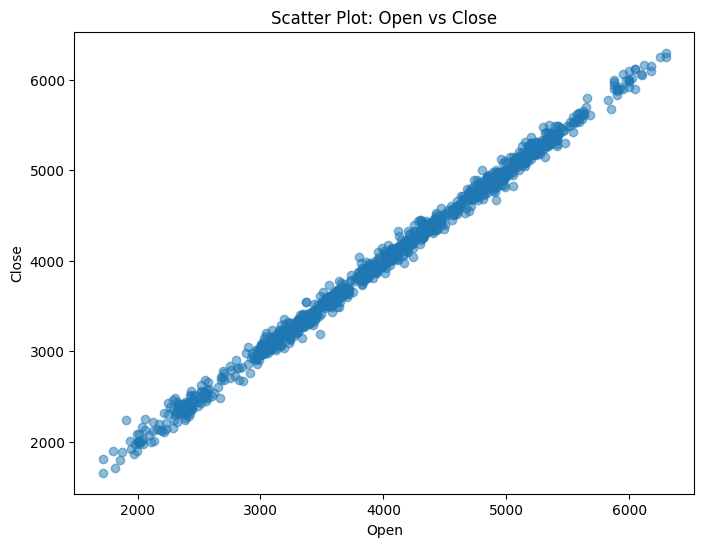

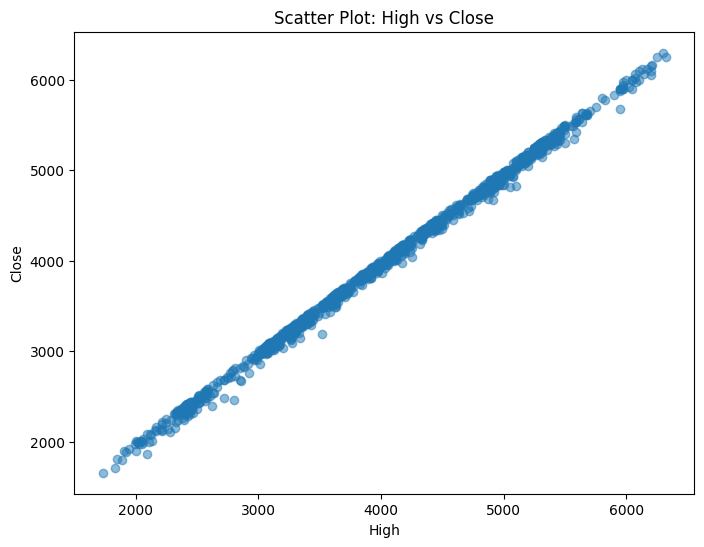

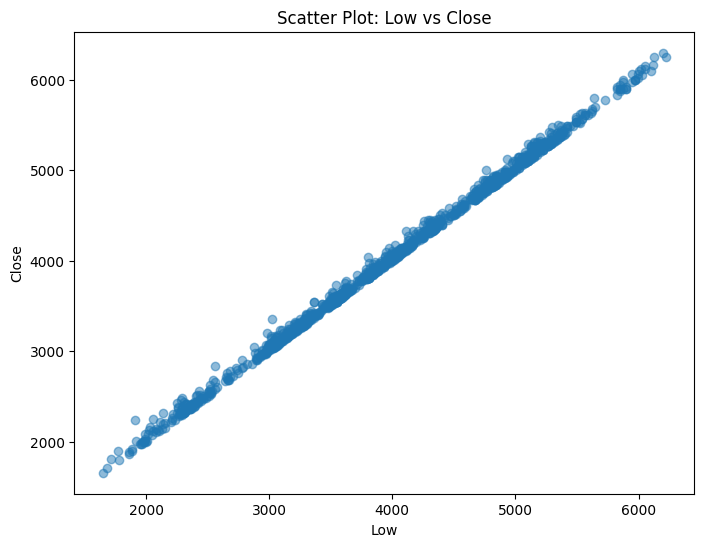

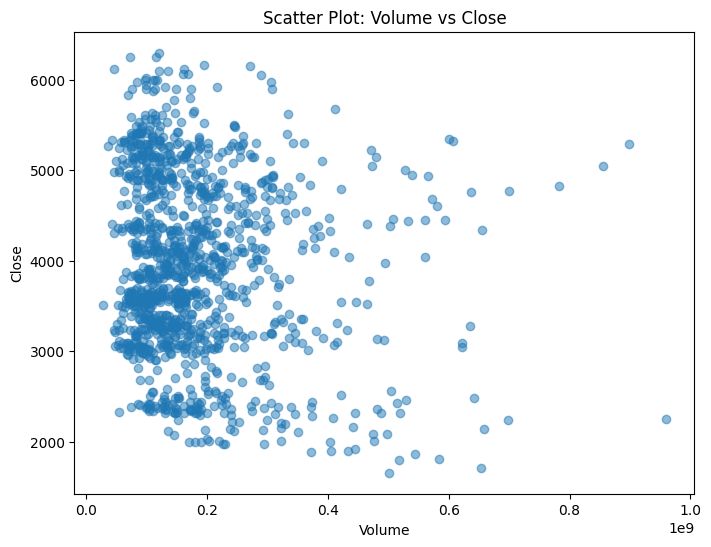

In [87]:
features = ['Open', 'High', 'Low', 'Volume']
for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[feature], df['Close'], alpha=0.5)
    plt.title(f'Scatter Plot: {feature} vs Close')
    plt.xlabel(feature)
    plt.ylabel('Close')
    plt.show()

### BBTN

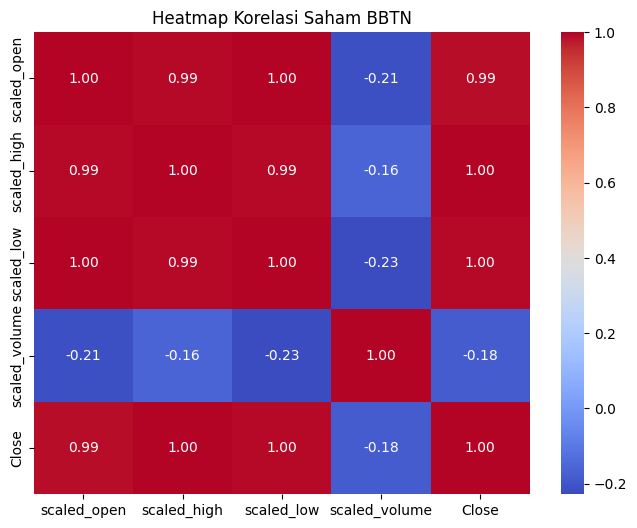

In [91]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Heatmap Korelasi Saham BBTN')
plt.show()

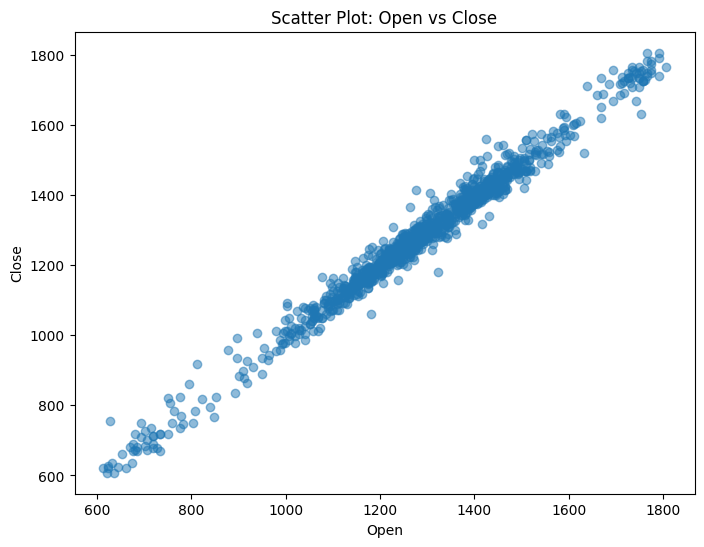

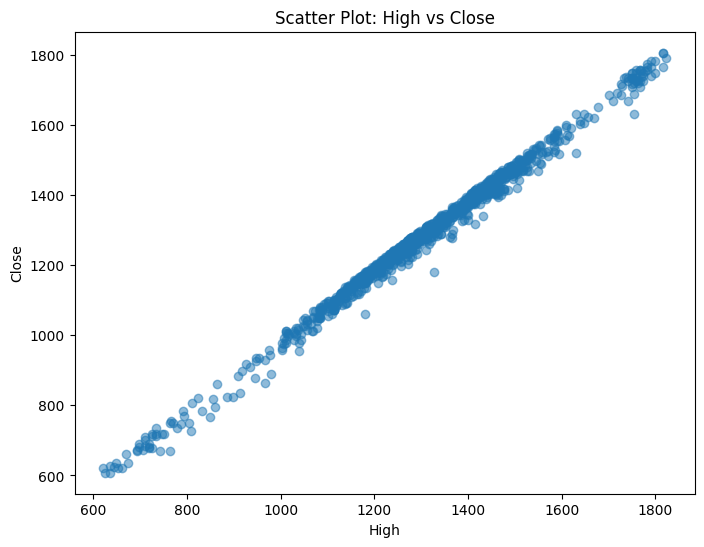

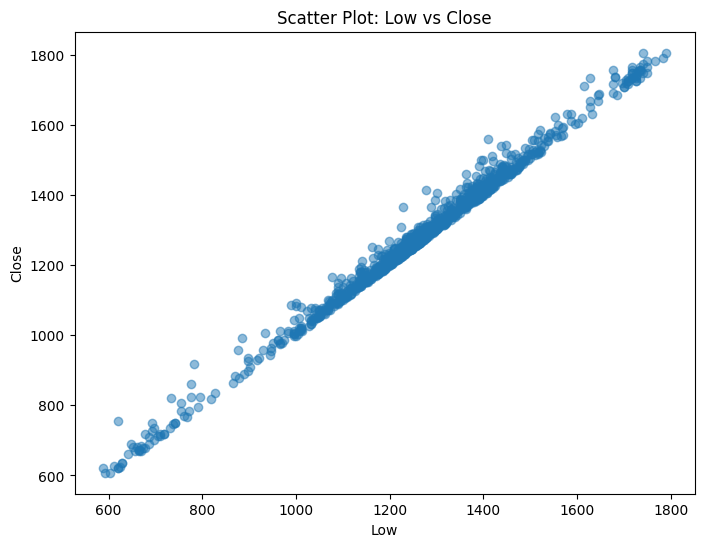

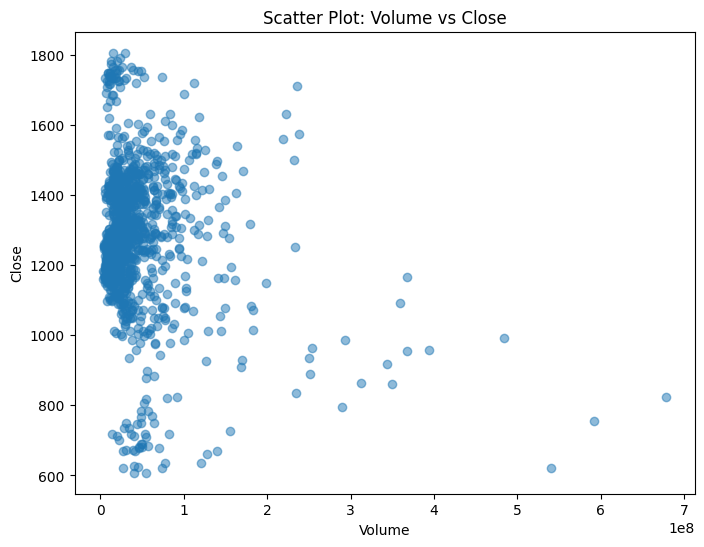

In [92]:
features = ['Open', 'High', 'Low', 'Volume']
for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[feature], df['Close'], alpha=0.5)
    plt.title(f'Scatter Plot: {feature} vs Close')
    plt.xlabel(feature)
    plt.ylabel('Close')
    plt.show()

### BRIS

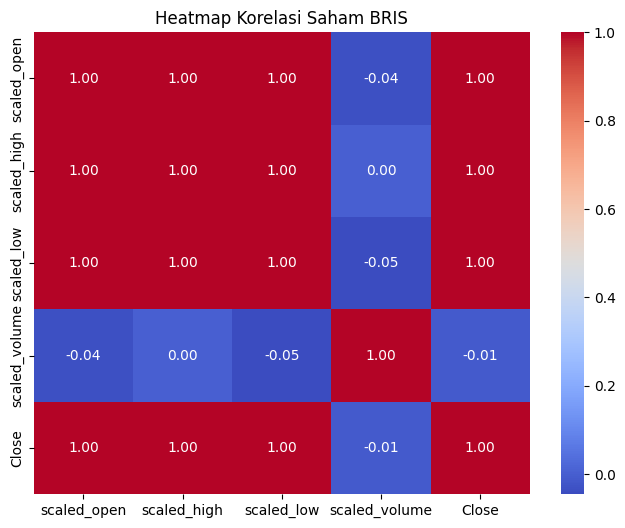

In [97]:
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Heatmap Korelasi Saham BRIS')
plt.show()

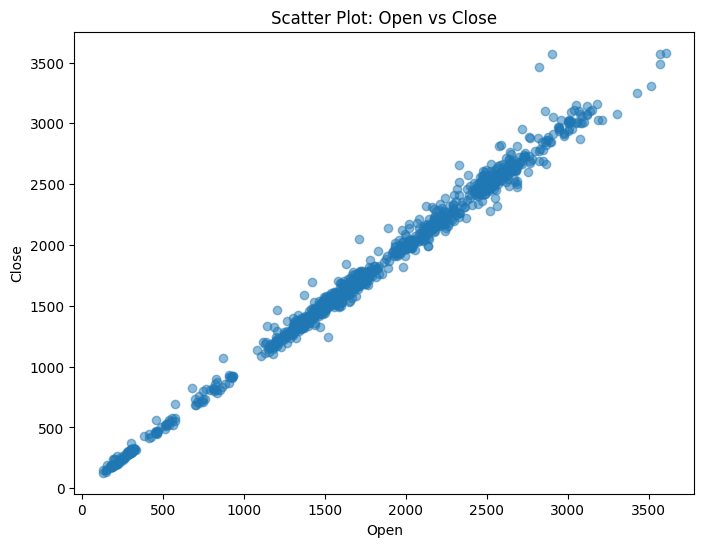

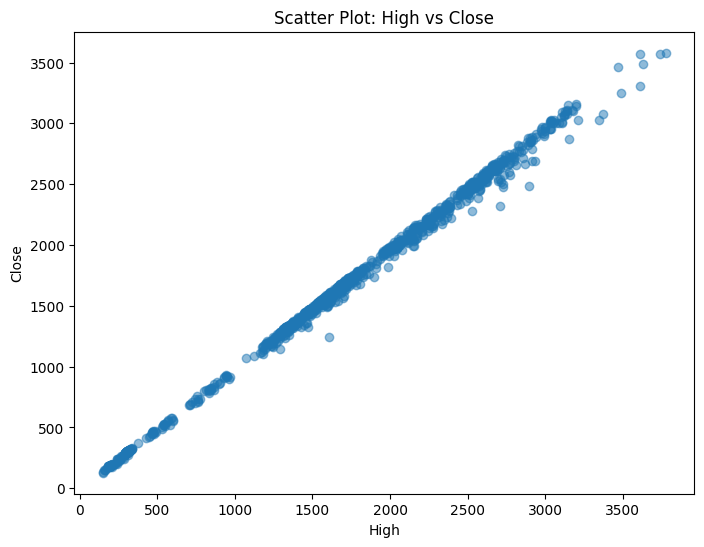

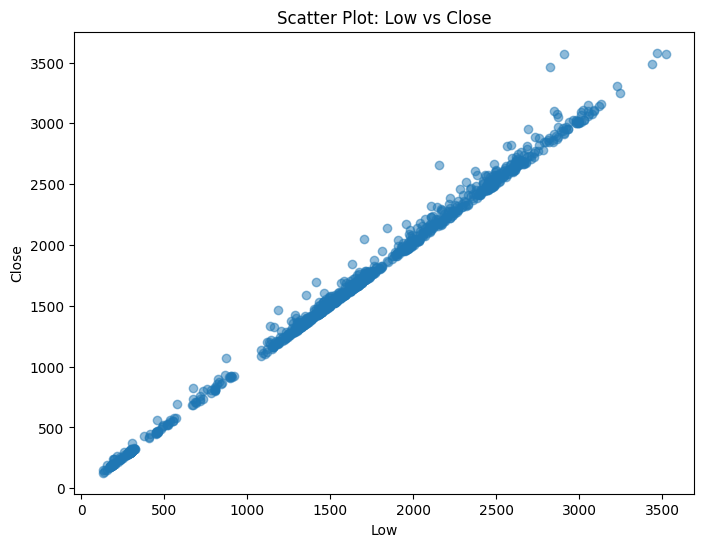

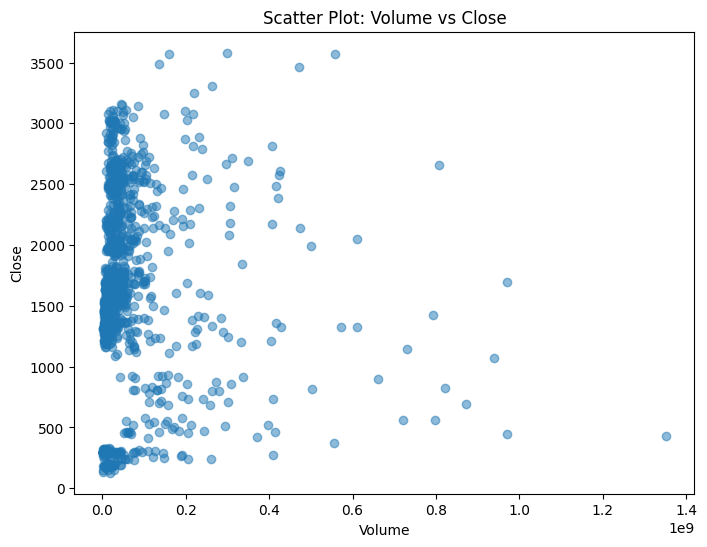

In [98]:
features = ['Open', 'High', 'Low', 'Volume']
for feature in features:
    plt.figure(figsize=(8, 6))
    plt.scatter(df[feature], df['Close'], alpha=0.5)
    plt.title(f'Scatter Plot: {feature} vs Close')
    plt.xlabel(feature)
    plt.ylabel('Close')
    plt.show()

## Experiment Model

### Manual

In [21]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, TimeSeriesSplit
import yfinance as yf
import matplotlib.pyplot as plt

from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

In [22]:
def add_lag(dataframe, days):
    df_copy = dataframe.copy()
    
    for feature in ['Open', 'High', 'Low']:
        df_copy[f'{feature.lower()}_lag'] = dataframe[feature].shift(periods=days)
    
    return df_copy

In [23]:
ticker = 'BBCA.JK'
market = yf.Ticker(ticker)
df = market.history(period='5y')
df = df.drop(columns=['Volume','Dividends','Stock Splits'], axis=1)
df = df.sort_index()

In [24]:
df_with_lags = add_lag(df, days=7)
df_with_lags.dropna()

,Open,High,Low,Close,open_lag,high_lag,low_lag
Date,,,,,,,
2019-12-10 00:00:00+07:00,5735.457246,5739.941575,5704.066940,5708.551270,5569.848459,5627.960843,5565.378276
2019-12-11 00:00:00+07:00,5708.551893,5726.489213,5695.098904,5722.004883,5614.550231,5744.185547,5605.609864
2019-12-12 00:00:00+07:00,5739.941838,5744.426167,5686.129883,5686.129883,5739.715538,5739.715538,5672.662786
2019-12-13 00:00:00+07:00,5735.457200,5757.878846,5695.098236,5704.066895,5686.072786,5721.834250,5681.602603
2019-12-16 00:00:00+07:00,5686.129577,5735.457200,5686.129577,5704.066895,5686.073606,5708.424524,5659.252504
...,...,...,...,...,...,...,...
2024-11-22 00:00:00+07:00,9925.000000,9950.000000,9850.000000,9850.000000,10174.255722,10199.131653,10099.627930
2024-11-25 00:00:00+07:00,9950.000000,10200.000000,9900.000000,10175.000000,10074.751907,10124.503768,10000.124115
2024-11-26 00:00:00+07:00,10250.000000,10250.000000,10000.000000,10000.000000,10000.124251,10224.007630,10000.124251


In [177]:
tss = TimeSeriesSplit(n_splits=10)

fold = 0
preds_rf = []
preds_xgb = []
rmse_score_rf = []
rmse_score_xgb = []
mae_score_rf = []
mae_score_xgb = []
r2_score_rf = []
r2_score_xgb = []

for train_idx, val_idx in tss.split(df):
    train = df.iloc[train_idx]
    test = df.iloc[val_idx]
    
    train = add_lag(train, 7)
    test = add_lag(test, 7)
    
    features = ['Open', 'High', 'Low',
                 'open_lag', 'high_lag', 'low_lag']
    target = 'Close'
    
    X_train = train[features]
    y_train = train[target]
    
    X_test = test[features]
    y_test = test[target]
    
    rf = RandomForestRegressor(n_estimators=200,
                               max_depth=15,
                               max_features=8,
                               min_samples_leaf=2,
                               min_samples_split=2)
    
    xgb =  XGBRegressor(n_estimators=300,
                        subsample=0.5,
                        learning_rate=0.05,
                        max_depth=7)
    
    rf.fit(X_train, y_train)
    xgb.fit(X_train, y_train)
    
    y_pred_rf = rf.predict(X_test)
    y_pred_xgb = xgb.predict(X_test)
    
    preds_rf.append(y_pred_rf)
    preds_xgb.append(y_pred_xgb)
    
    rmse_rf = root_mean_squared_error(y_test, y_pred_rf)
    rmse_xgb = root_mean_squared_error(y_test, y_pred_xgb)
    
    mae_rf = mean_absolute_error(y_test, y_pred_rf)
    mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
    
    r2_rf = r2_score(y_test, y_pred_rf)
    r2_xgb = r2_score(y_test, y_pred_xgb)
    
    rmse_score_rf.append(rmse_rf)
    rmse_score_xgb.append(rmse_xgb)
    
    mae_score_rf.append(mae_rf)
    mae_score_xgb.append(mae_xgb)
    
    r2_score_rf.append(r2_rf)
    r2_score_xgb.append(r2_xgb)
    
mean_rmse_rf = np.mean(rmse_score_rf)
mean_rmse_xgb = np.mean(rmse_score_xgb)

mean_mae_rf = np.mean(mae_score_rf)
mean_mae_xgb = np.mean(mae_score_xgb)

mean_r2_rf = np.mean(r2_score_rf)
mean_r2_xgb = np.mean(r2_score_xgb)

#### RMSE Score

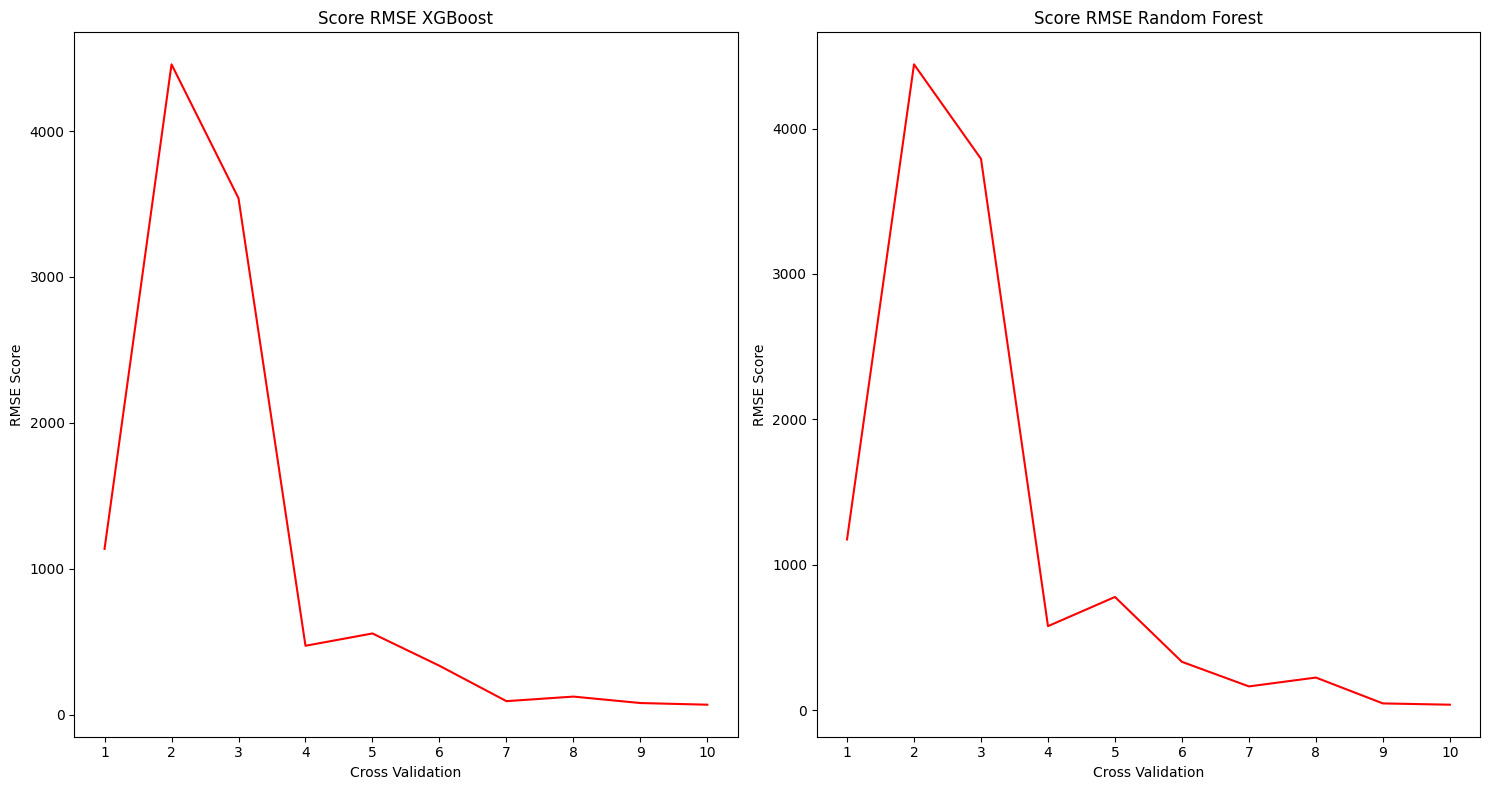

In [184]:
plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)
plt.plot(range(1, len(rmse_score_xgb) + 1), rmse_score_xgb, color='red', label='rmse_score_xgb')
plt.title('Score RMSE XGBoost')
plt.xlabel('Cross Validation')
plt.xticks(range(1, len(rmse_score_xgb) + 1))
plt.ylabel('RMSE Score')

plt.subplot(1,2,2)
plt.plot(range(1, len(rmse_score_rf) + 1), rmse_score_rf, color='red', label='rmse_score_rf')
plt.title('Score RMSE Random Forest')
plt.xlabel('Cross Validation')
plt.xticks(range(1, len(rmse_score_rf) + 1))
plt.ylabel('RMSE Score')

plt.tight_layout()
plt.show()

#### MAE Score

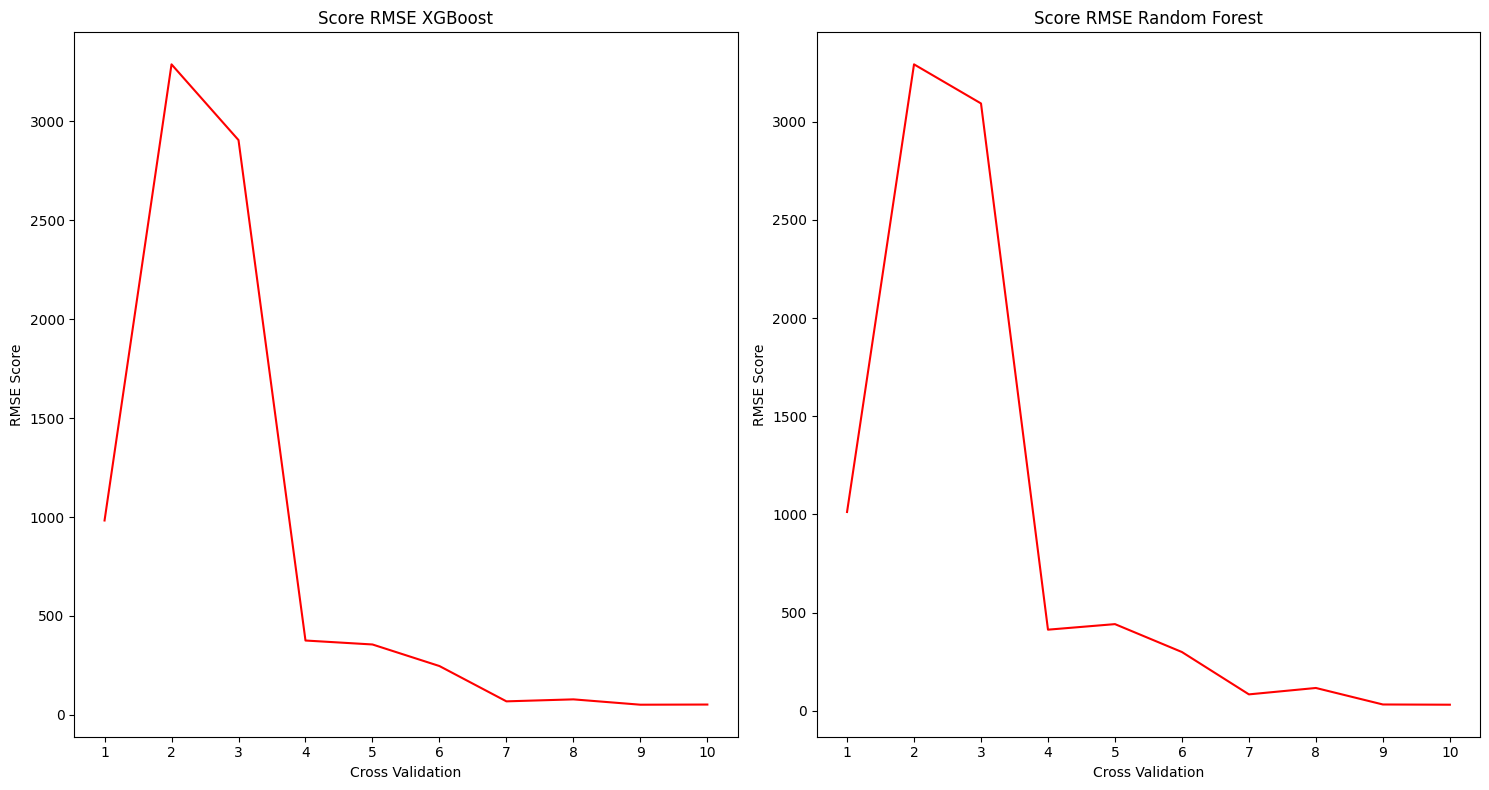

In [170]:
plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)
plt.plot(range(1, len(mae_score_xgb) + 1), mae_score_xgb, color='red')
plt.title('Score RMSE XGBoost')
plt.xlabel('Cross Validation')
plt.xticks(range(1, len(mae_score_xgb) + 1))
plt.ylabel('RMSE Score')

plt.subplot(1,2,2)
plt.plot(range(1, len(mae_score_rf) + 1), mae_score_rf, color='red')
plt.title('Score RMSE Random Forest')
plt.xlabel('Cross Validation')
plt.xticks(range(1, len(mae_score_rf) + 1))
plt.ylabel('RMSE Score')

plt.tight_layout()
plt.show()

#### R2 Score

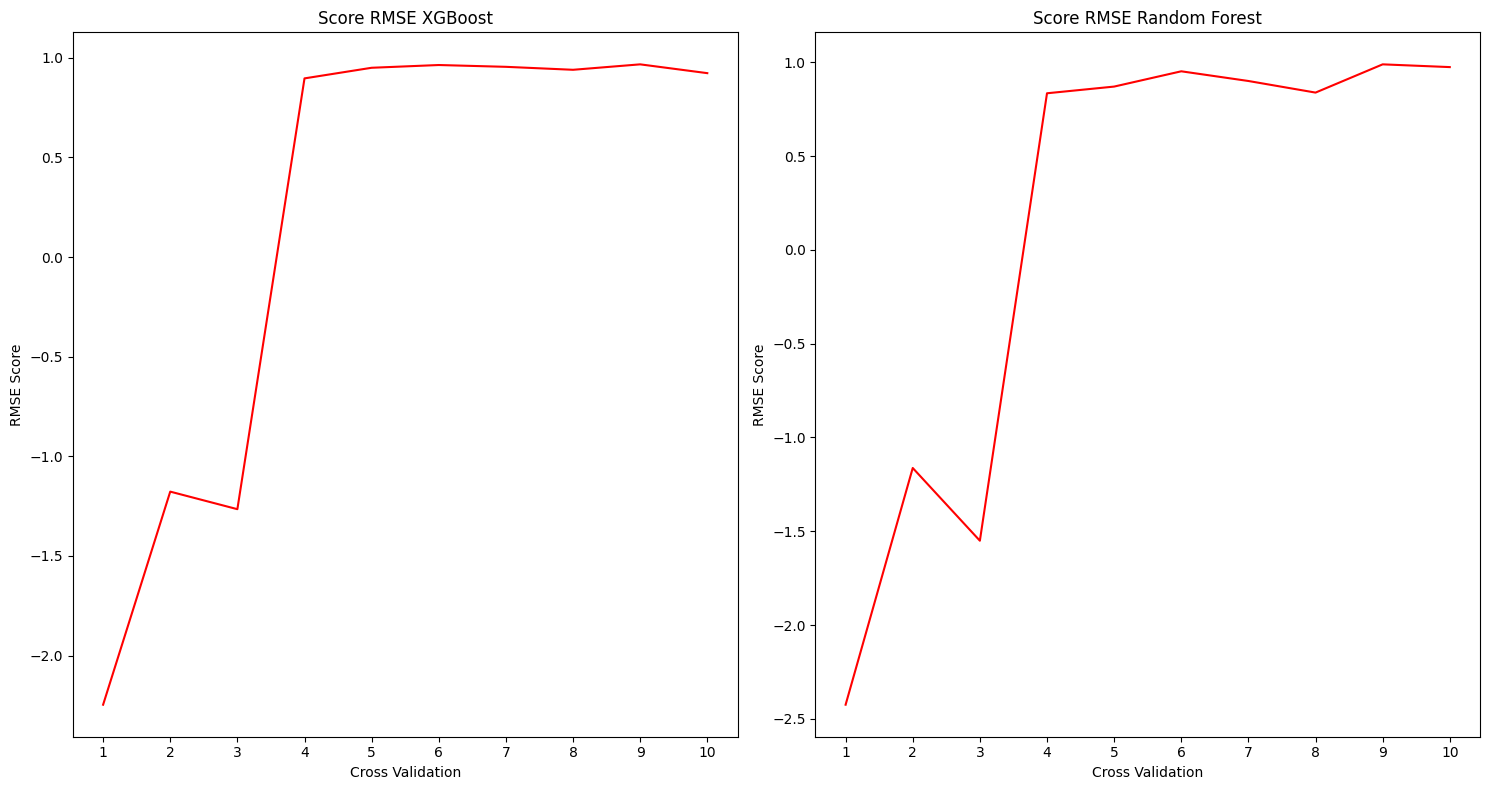

In [171]:
plt.figure(figsize=(15, 8))
plt.subplot(1,2,1)
plt.plot(range(1, len(r2_score_xgb) + 1), r2_score_xgb, color='red')
plt.title('Score RMSE XGBoost')
plt.xlabel('Cross Validation')
plt.xticks(range(1, len(r2_score_xgb) + 1))
plt.ylabel('RMSE Score')

plt.subplot(1,2,2)
plt.plot(range(1, len(r2_score_rf) + 1), r2_score_rf, color='red')
plt.title('Score RMSE Random Forest')
plt.xlabel('Cross Validation')
plt.xticks(range(1, len(r2_score_rf) + 1))
plt.ylabel('RMSE Score')

plt.tight_layout()
plt.show()

### W/ GridSearch

In [4]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score, TimeSeriesSplit
from sklearn.preprocessing import RobustScaler
import yfinance as yf
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

In [5]:
def add_lag(dataframe, days):
    df_copy = dataframe.copy()
    
    for feature in ['Open', 'High', 'Low']:
        df_copy[f'{feature.lower()}_lag'] = dataframe[feature].shift(periods=days)
    
    return df_copy

In [13]:
ticker = 'BBCA.JK'
market = yf.Ticker(ticker)
df = market.history(period='5y')
df = df.drop(columns=['Volume','Dividends','Stock Splits'], axis=1)
df = df.sort_index()

In [14]:
df_with_lags = add_lag(df, days=7)
df_with_lags.dropna()

,Open,High,Low,Close,open_lag,high_lag,low_lag
Date,,,,,,,
2019-12-12 00:00:00+07:00,5739.940852,5744.425181,5686.128906,5686.128906,5739.715046,5739.715046,5672.662300
2019-12-13 00:00:00+07:00,5735.456709,5757.878353,5695.097748,5704.066406,5686.072786,5721.834250,5681.602603
2019-12-16 00:00:00+07:00,5686.129091,5735.456709,5686.129091,5704.066406,5686.072626,5708.423540,5659.251529
2019-12-17 00:00:00+07:00,5735.456537,5829.627441,5708.550564,5829.627441,5686.128926,5735.456543,5668.191611
2019-12-18 00:00:00+07:00,5829.627359,6098.687084,5775.815415,6058.328125,5713.034899,5735.456543,5704.066241
...,...,...,...,...,...,...,...
2024-11-26 00:00:00+07:00,10250.000000,10250.000000,10000.000000,10000.000000,10000.124251,10224.007630,10000.124251
2024-11-28 00:00:00+07:00,9975.000000,10075.000000,9925.000000,10000.000000,10024.999861,10074.751721,9950.372070
2024-11-29 00:00:00+07:00,10000.000000,10100.000000,9950.000000,10000.000000,9850.868211,9975.247860,9850.868211


In [15]:
rs = RobustScaler()

In [16]:
features = ['open_lag','high_lag','low_lag']
target = ['Close']

X = df_with_lags[features].tail(7)
y = df_with_lags[target].tail(7)

X, y

(                               open_lag      high_lag       low_lag
 Date                                                               
 2024-11-22 00:00:00+07:00  10174.255722  10199.131653  10099.627930
 2024-11-25 00:00:00+07:00  10074.751907  10124.503768  10000.124115
 2024-11-26 00:00:00+07:00  10000.124251  10224.007630  10000.124251
 2024-11-28 00:00:00+07:00  10024.999861  10074.751721   9950.372070
 2024-11-29 00:00:00+07:00   9850.868211   9975.247860   9850.868211
 2024-12-02 00:00:00+07:00   9975.248139  10099.627792   9950.372208
 2024-12-03 00:00:00+07:00  10000.000000  10000.000000   9850.000000,
                              Close
 Date                              
 2024-11-22 00:00:00+07:00   9850.0
 2024-11-25 00:00:00+07:00  10175.0
 2024-11-26 00:00:00+07:00  10000.0
 2024-11-28 00:00:00+07:00  10000.0
 2024-11-29 00:00:00+07:00  10000.0
 2024-12-02 00:00:00+07:00   9750.0
 2024-12-03 00:00:00+07:00  10000.0)

In [23]:
features = ['open_lag','high_lag','low_lag']
target = ['Close']

X = df_with_lags[features]
y = df_with_lags[target].values.ravel()

# X = rs.fit_transform(X)

In [22]:
X[-7:], y[-7:]

(array([[1.04192006, 1.00650688, 1.04029268],
        [1.00581477, 0.97969791, 1.00439785],
        [0.97873587, 1.01544321, 1.0043979 ],
        [0.98776207, 0.96182522, 0.98645039],
        [0.92457782, 0.92607992, 0.95055555],
        [0.96970949, 0.97076158, 0.98645044],
        [0.97869079, 0.93497176, 0.95024235]]),
 array([ 9850., 10175., 10000., 10000., 10000.,  9750., 10000.]))

In [24]:
rf = RandomForestRegressor(n_estimators=100,
                            max_depth=10,
                            max_features=8,
                            min_samples_leaf=2,
                            min_samples_split=2)

xgb =  XGBRegressor(n_estimators=300,
                    subsample=0.5,
                    learning_rate=0.05,
                    max_depth=3)

vr = VotingRegressor(estimators=[
    ('rf', rf),
    ('xgb', xgb)
], weights=[2,1])

vr.fit(X,y)
y_pred = vr.predict(X)

rmse = root_mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

print(f'RMSE Perfomance: {rmse}')
print(f'MAE Perfomance: {mae}')
print(f'R2 Perfomance: {r2}')

RMSE Perfomance: 150.21909893113047
MAE Perfomance: 113.10150131107515
R2 Perfomance: 0.9915439746667767


In [105]:
result_cv5 = pd.DataFrame({
    'weight_vr': ['None','[1,1]','[1,2]','[2,1]','[2,2]'],
    'rmse': [104.65358205692931,104.55249556658416,107.56236759823123,101.82396753374731,104.70985893697758],
    'mae': [67.45847034995958,67.55613244137203,70.61281782757727,64.39448249760106,67.29745922040915],
    'r2': [0.9806865472811693,0.980723839578694,0.9795980146583462,0.9817168191420207,0.9806657702933578],
})

result_cv10 = pd.DataFrame({
    'weight_vr': ['None','[1,1]','[1,2]','[2,1]','[2,2]'],
    'rmse': [105.74182352786713,106.34812974001404,110.1114625328176,102.04417120911006,106.49495023457507],
    'mae': [67.51656463660987,67.79067133964523,71.3448639121976,64.08244469658199,67.55134943777382],
    'r2': [0.9802827966177249,0.9800560379799111,0.9786195526804368,0.9816376555218501,0.980000932099867],
})

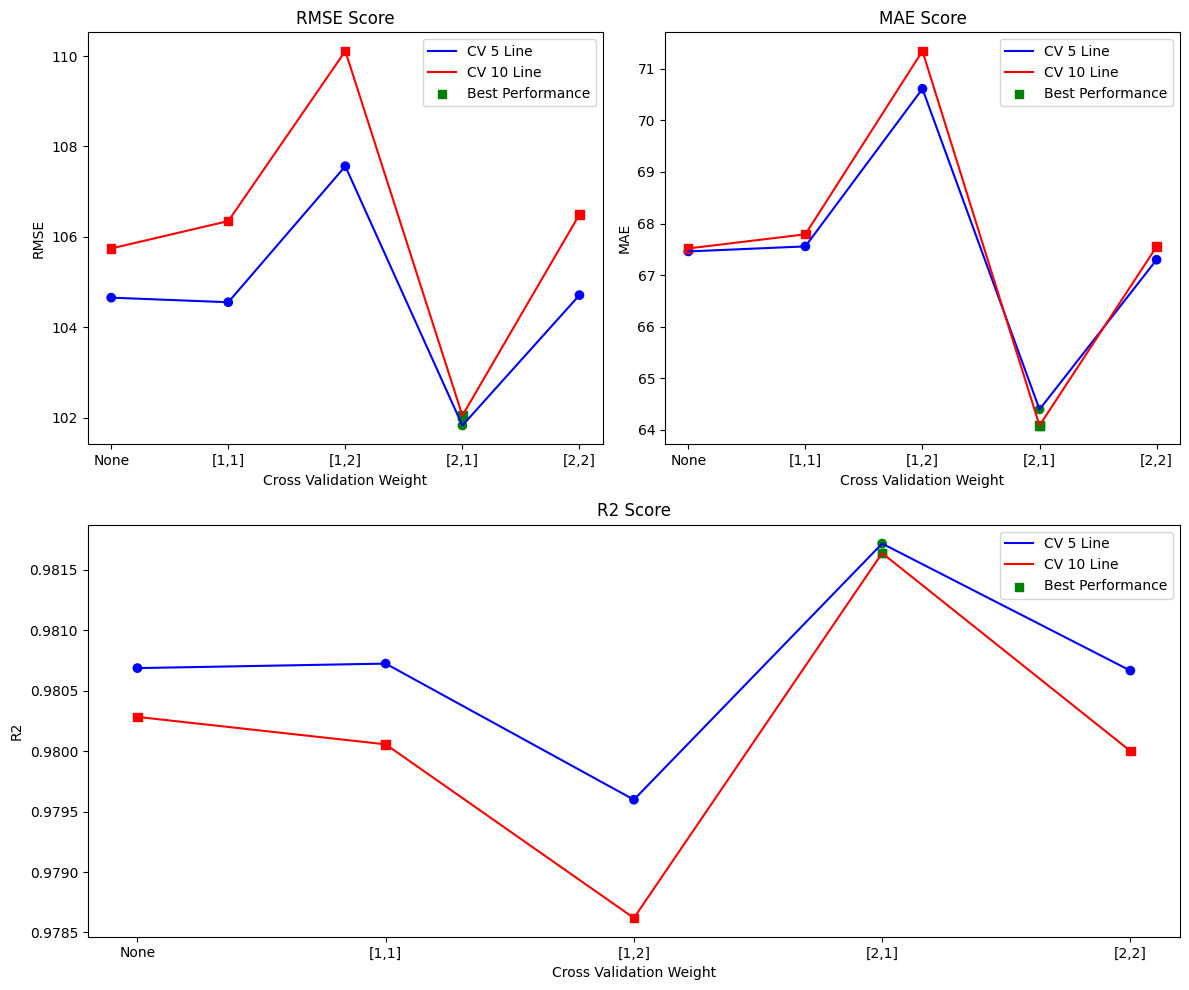

In [106]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
best_cv10_index_rmse = result_cv10['rmse'].argmin()
best_cv5_index_rmse = result_cv5['rmse'].argmin()

plt.plot(result_cv5['weight_vr'], result_cv5['rmse'], color='blue', label='CV 5 Line')
plt.scatter(result_cv5['weight_vr'], result_cv5['rmse'], 
            color=['green' if j == best_cv5_index_rmse else 'blue' for j in range(len(result_cv5))], marker='o')
plt.plot(result_cv10['weight_vr'], result_cv10['rmse'], color='red', label='CV 10 Line')
plt.scatter(result_cv10['weight_vr'], result_cv10['rmse'], 
            color=['green' if j == best_cv10_index_rmse else 'red' for j in range(len(result_cv10))], marker='s')
plt.scatter(best_cv10_index_rmse, result_cv10['rmse'][best_cv10_index_rmse], color='green', label='Best Performance', marker='s')

plt.title('RMSE Score')
plt.xlabel('Cross Validation Weight')
plt.ylabel('RMSE')
plt.xticks(result_cv10['weight_vr'], result_cv10['weight_vr'])
plt.legend()

plt.subplot(2, 2, 2) 
best_cv10_index_mae = result_cv10['mae'].argmin()
best_cv5_index_mae = result_cv5['mae'].argmin()


plt.plot(result_cv5['weight_vr'], result_cv5['mae'], color='blue', label='CV 5 Line')
plt.scatter(result_cv5['weight_vr'], result_cv5['mae'], 
            color=['green' if j == best_cv5_index_mae else 'blue' for j in range(len(result_cv5))], marker='o')
plt.plot(result_cv10['weight_vr'], result_cv10['mae'], color='red', label='CV 10 Line')
plt.scatter(result_cv10['weight_vr'], result_cv10['mae'], 
            color=['green' if j == best_cv10_index_mae else 'red' for j in range(len(result_cv10))], marker='s')
plt.scatter(best_cv10_index_mae, result_cv10['mae'][best_cv10_index_mae], color='green', label='Best Performance', marker='s')

plt.title('MAE Score')
plt.xlabel('Cross Validation Weight')
plt.ylabel('MAE')
plt.xticks(result_cv10['weight_vr'], result_cv10['weight_vr'])
plt.legend()

plt.subplot(2, 2, (3,4)) 
best_cv10_index_r2 = result_cv10['r2'].argmax()
best_cv5_index_r2 = result_cv5['r2'].argmax()


plt.plot(result_cv5['weight_vr'], result_cv5['r2'], color='blue', label='CV 5 Line')
plt.scatter(result_cv5['weight_vr'], result_cv5['r2'], 
            color=['green' if j == best_cv5_index_r2 else 'blue' for j in range(len(result_cv5))], marker='o')
plt.plot(result_cv10['weight_vr'], result_cv10['r2'], color='red', label='CV 10 Line')
plt.scatter(result_cv10['weight_vr'], result_cv10['r2'], 
            color=['green' if j == best_cv10_index_r2 else 'red' for j in range(len(result_cv10))], marker='s')
plt.scatter(best_cv10_index_r2, result_cv10['r2'][best_cv10_index_r2], color='green', label='Best Performance', marker='s')

plt.title('R2 Score')
plt.xlabel('Cross Validation Weight')
plt.ylabel('R2')
plt.xticks(result_cv10['weight_vr'], result_cv10['weight_vr'])
plt.legend()

plt.tight_layout()
plt.show()

In [108]:
best_result = pd.DataFrame({
    'ticker': ['BBCA','ARTO','BMRI','BBNI','BBRI','BBTN','BRIS'],
    'rmse': [86.6031912941307,301.799512582734,74.9385782922851,101.78729735875,77.7737137474832,47.9639589984384,101.823967533747],
    'mae': [65.2550769558852,183.902562820704,50.8358722460844,76.7001329636897,56.8835414743119,33.4341753626054,64.394482497601],
    'r2': [0.997184851245432,0.99667179277248,0.997746758083967,0.99194528065533,0.993719457924852,0.940138969528114,0.98171681914202],
})

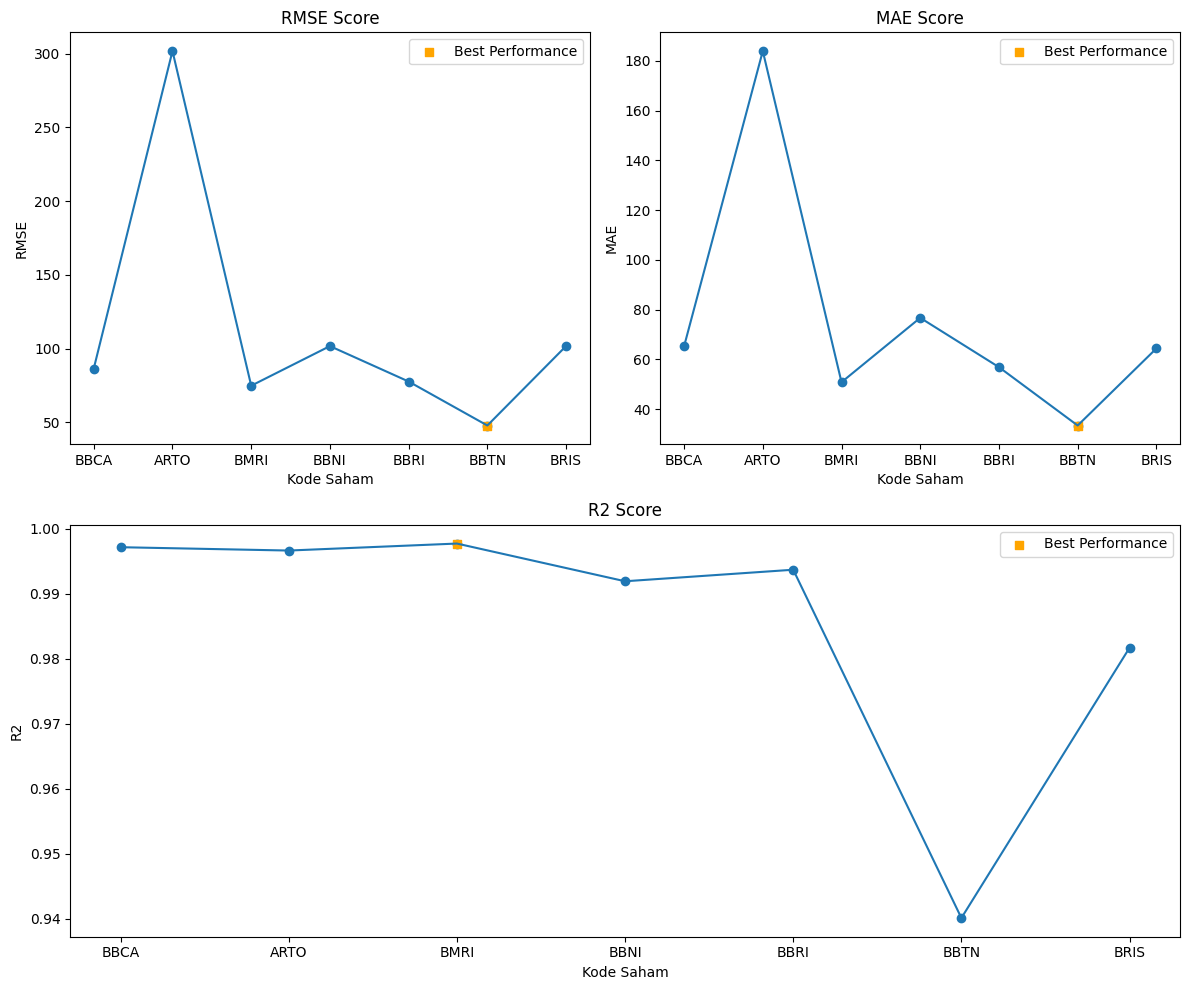

In [115]:
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
best_index_rmse = best_result['rmse'].argmin()

plt.plot(best_result['ticker'], best_result['rmse'])
plt.scatter(best_result['ticker'], best_result['rmse'], marker='o')
plt.scatter(best_index_rmse, best_result['rmse'][best_index_rmse], color='orange', label='Best Performance', marker='s')

plt.title('RMSE Score')
plt.xlabel('Kode Saham')
plt.ylabel('RMSE')
plt.xticks(best_result['ticker'], best_result['ticker'])
plt.legend()

plt.subplot(2, 2, 2) 
best_index_mae = best_result['mae'].argmin()


plt.plot(best_result['ticker'], best_result['mae'])
plt.scatter(best_result['ticker'], best_result['mae'], marker='o')
plt.scatter(best_index_mae, best_result['mae'][best_index_mae], color='orange', label='Best Performance', marker='s')

plt.title('MAE Score')
plt.xlabel('Kode Saham')
plt.ylabel('MAE')
plt.xticks(best_result['ticker'], best_result['ticker'])
plt.legend()

plt.subplot(2, 2, (3,4)) 
best_index_r2 = best_result['r2'].argmax()


plt.plot(best_result['ticker'], best_result['r2'])
plt.scatter(best_result['ticker'], best_result['r2'], marker='o')
plt.scatter(best_index_r2, best_result['r2'][best_index_r2], color='orange', label='Best Performance', marker='s')

plt.title('R2 Score')
plt.xlabel('Kode Saham')
plt.ylabel('R2')
plt.xticks(best_result['ticker'], best_result['ticker'])
plt.legend()

plt.tight_layout()
plt.show()

#### Chart Evaluation

In [18]:
print(f'RMSE Scores: {rmse_score_vr}')
print(f'MAE Scores: {mae_score_vr}')
print(f'R2 Scores: {r2_score_vr}')

RMSE Scores: 142.58445596485439
MAE Scores: 106.44044425982602
R2 Scores: 0.9923690619592526


TypeError: object of type 'numpy.float64' has no len()

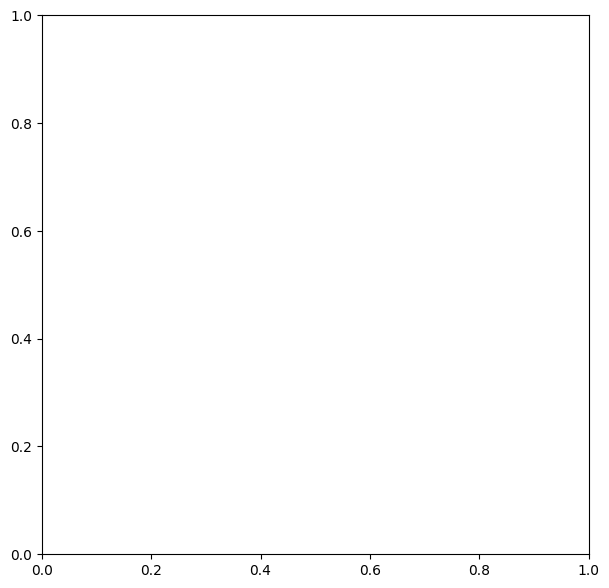

In [19]:
plt.figure(figsize=(24, 7))
plt.subplot(1,3,1)
plt.plot(range(1, len(rmse_score_vr) + 1), rmse_score_vr, color='red', label='rmse_score_vr')
plt.title('Score RMSE Voting Regressor')
plt.xlabel('Cross Validation Fold')
plt.xticks(range(1, len(rmse_score_vr) + 1))
plt.ylabel('RMSE Score')

plt.subplot(1,3,2)
plt.plot(range(1, len(rmse_score_vr) + 1), rmse_score_vr, color='red', label='rmse_score_vr')
plt.title('Score MAE Voting Regressor')
plt.xlabel('Cross Validation Fold')
plt.xticks(range(1, len(rmse_score_vr) + 1))
plt.ylabel('MAE Score')

plt.subplot(1,3,3)
plt.plot(range(1, len(r2_score_vr) + 1), r2_score_vr, color='red', label='r2_score_vr')
plt.title('Score R2 Voting Regressor')
plt.xlabel('Cross Validation Fold')
plt.xticks(range(1, len(r2_score_vr) + 1))
plt.ylabel('R2 Score')

plt.tight_layout()
plt.show()

#### Best Perfoming Fold

In [224]:
recent_rmse = np.median(rmse_score_vr[-3:])
recent_mae = np.median(mae_score_vr[-3:])
recent_r2 = np.median(r2_score_vr[-3:])

In [225]:
print(f'Best RMSE: {recent_rmse}')
print(f'Best MAE: {recent_mae}')
print(f'Best R2: {recent_r2}')

Best RMSE: 54.504464974251746
Best MAE: 39.71353717961544
Best R2: 0.9639393137739877


In [220]:
best_fold_index = np.argmin(rmse_score_vr)
best_rmse = rmse_score_vr[best_fold_index]
best_mae = mae_score_vr[best_fold_index]
best_r2 = r2_score_vr[best_fold_index]

In [221]:
print(f'Best RMSE: {best_rmse}')
print(f'Best MAE: {best_mae}')
print(f'Best R2: {best_r2}')

Best RMSE: 47.946065903961866
Best MAE: 37.63977513211
Best R2: 0.9639393137739877


## Chart of Evaluation Experiment

In [ ]:
results = pd.DataFrame({
    'Ticker': ['ARTO','BBCA','BBNI','BBRI','BBTN','BMRI','BRIS'],
    'RMSE': [507.4515, 235.2111,],
    'MAE': [312.4797,176.8359],
    'R2': [0.9906,0.]
})